In [1]:
import time

import numpy as np

import matplotlib.pyplot as plt

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import WhiteKernel, ExpSineSquared, RBF, RationalQuadratic, Matern, ConstantKernel as C

In [2]:
rng = np.random.RandomState(0)

In [3]:
data = np.loadtxt('data/HDiagramCompilacion-data_31.txt')
data.shape

(31, 3)

In [4]:
# Generate sample data
X = data[:, 0]
l = len(X)
X = X.reshape(l, 1)
X.shape

(31, 1)

In [5]:
np.max(X)

1.965

In [6]:
y = data[:, 1]
y.shape

(31,)

In [7]:
noise = data[:, 2]
noise.shape

(31,)

In [17]:
k3 = 0.66**2 * RationalQuadratic(length_scale=1.2, alpha=0.2)
gp_kernel = k3 #k3 esta mas o menos

In [18]:
gpr = GaussianProcessRegressor(kernel=gp_kernel)
gpr

GaussianProcessRegressor(alpha=1e-10, copy_X_train=True,
                         kernel=0.66**2 * RationalQuadratic(alpha=0.2, length_scale=1.2),
                         n_restarts_optimizer=0, normalize_y=False,
                         optimizer='fmin_l_bfgs_b', random_state=None)

In [19]:
gpr.fit(X, y)

GaussianProcessRegressor(alpha=1e-10, copy_X_train=True,
                         kernel=0.66**2 * RationalQuadratic(alpha=0.2, length_scale=1.2),
                         n_restarts_optimizer=0, normalize_y=False,
                         optimizer='fmin_l_bfgs_b', random_state=None)

In [20]:
X_plot = np.linspace(0, 2, 10000)[:, None]
X_plot

array([[0.00000000e+00],
       [2.00020002e-04],
       [4.00040004e-04],
       ...,
       [1.99959996e+00],
       [1.99979998e+00],
       [2.00000000e+00]])

In [21]:
y_gpr, y_std = gpr.predict(X_plot, return_std=True)
y_gpr

array([ 89.40582872,  89.38625012,  89.36663047, ..., 162.64703395,
       162.61417766, 162.58148431])

<ErrorbarContainer object of 3 artists>

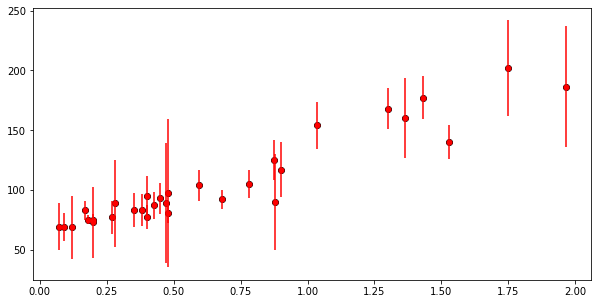

In [22]:
# Plot results
plt.figure(figsize=(10, 5))
lw = 2
plt.scatter(X, y, c='k', label='data')
plt.errorbar(X.ravel(), y, noise, fmt='r.', markersize=10, label='Observations')

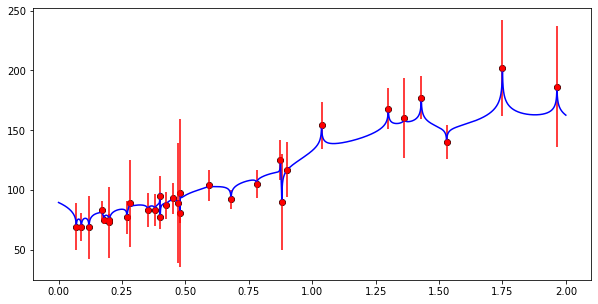

In [23]:
# Plot results
plt.figure(figsize=(10, 5))
lw = 2
plt.scatter(X, y, c='k', label='data')
plt.errorbar(X.ravel(), y, noise, fmt='r.', markersize=10, label='Observations')
plt.plot(X_plot, y_gpr, 'b-', label='Prediction')

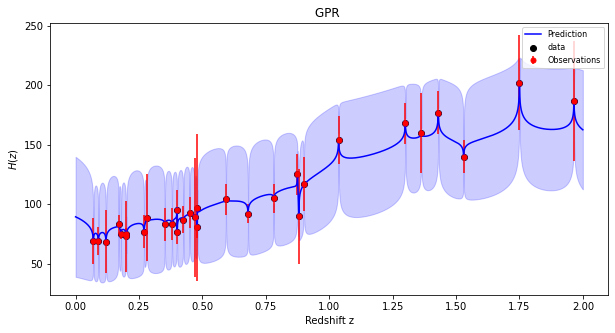

In [26]:
# Plot results
plt.figure(figsize=(10, 5))
lw = 2
plt.scatter(X, y, c='k', label='data')
plt.errorbar(X.ravel(), y, noise, fmt='r.', markersize=10, label='Observations')
plt.plot(X_plot, y_gpr, 'b-', label='Prediction')
plt.fill_between(X_plot[:, 0], y_gpr - 1.96*y_std, y_gpr + 1.96*y_std, color='blue',
                 alpha=0.2)

plt.xlabel('Redshift z')
plt.ylabel('$H(z)$')

plt.title('GPR ')
plt.legend(loc="best",  scatterpoints=1, prop={'size': 8})
plt.show()